In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4] diabetes prediction using machine learning algorithms

In [ ]:
df=pd.read_csv("/content/Training.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 pregnency:Number of times pregnant.
Glucose: Plasma glucose concentration (2 hours in an oral glucose tolerance test).
BloodPressure: Diastolic blood pressure (mm Hg).
SkinThickness: Triceps skin fold thickness (mm).
Insulin: 2-Hour serum insulin (mu U/ml).
BMI: Body mass index (weight in kg/(height in m)^2).
DiabetesPedigreeFunction: A score determining the genetic risk of diabetes based on family history.
Age: Age in years.
Outcome: The target variable, where 1 indicates the patient has diabetes and 0 indicates they do not.

info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


shape

In [ ]:
df.shape

(2460, 9)

describe method

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


size


In [ ]:
df.size

22140

corr

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.185535,0.110625,-0.029415,-0.030863,0.094674,-0.053568,0.541545,0.218263
Glucose,0.185535,1.000000,0.116223,0.058602,0.351118,0.252411,0.167317,0.270796,0.440045
BloodPressure,0.110625,0.116223,1.000000,0.205257,0.102433,0.245112,0.007001,0.202828,0.069604
SkinThickness,-0.029415,0.058602,0.205257,1.000000,0.478468,0.376467,0.173692,-0.130043,0.071114
Insulin,-0.030863,0.351118,0.102433,0.478468,1.000000,0.204730,0.228555,-0.017574,0.109022
BMI,0.094674,0.252411,0.245112,0.376467,0.204730,1.000000,0.123726,0.067208,0.308345
DiabetesPedigreeFunction,-0.053568,0.167317,0.007001,0.173692,0.228555,0.123726,1.000000,0.041072,0.160543
Age,0.541545,0.270796,0.202828,-0.130043,-0.017574,0.067208,0.041072,1.000000,0.217349
Outcome,0.218263,0.440045,0.069604,0.071114,0.109022,0.308345,0.160543,0.217349,1.000000


null values

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


colums

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

 data droping

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

sns of heatmaping

<Axes: >

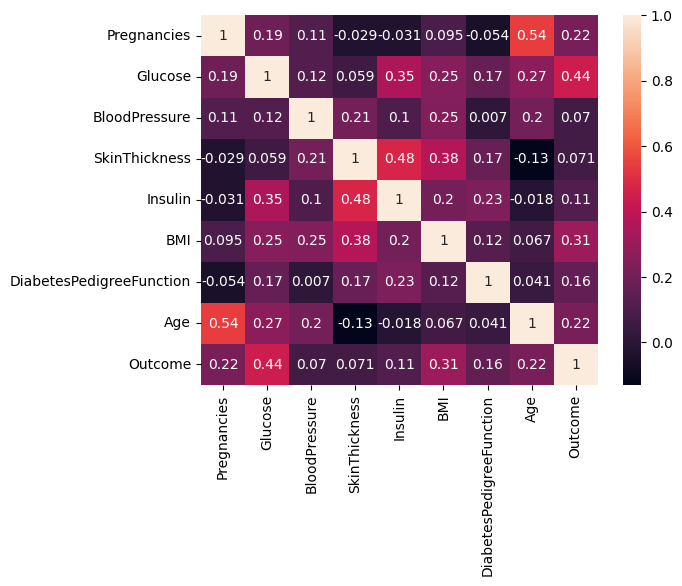

In [ ]:
sns.heatmap(df.corr(),annot=True)

spliting method

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

logistic method

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

prepredict method

In [ ]:
ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)


accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

0.743321718931475
0.7655826558265583


cross value score method

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)


array([[393,  52],
       [121, 172]])

classification report method

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       445
           1       0.77      0.59      0.67       293

    accuracy                           0.77       738
   macro avg       0.77      0.74      0.74       738
weighted avg       0.77      0.77      0.76       738



SVM

In [ ]:
# Hyperparameter for SVC

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# model
estimator = SVC()

# parameters (which want to tune and identify the best)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

grid.fit(x_train, y_train)

print(grid.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC # Import SVC explicitly

# Train SVM model on the diabetes dataset
model = SVC()
model.fit(x_train, y_train)

# Make predictions
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, ypred_test))

# Print accuracy score
print('Train:', accuracy_score(y_train, ypred_train))
print('Test', accuracy_score(y_test, ypred_test))

# Calculate cross-validation score
scores = cross_val_score(model, x, y, cv=5)
print("Cross Validation Score:", scores.mean())

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       445
           1       0.78      0.54      0.64       293

    accuracy                           0.76       738
   macro avg       0.76      0.72      0.73       738
weighted avg       0.76      0.76      0.75       738

Train: 0.7305458768873403
Test 0.7574525745257452
Cross Validation Score: 0.7414634146341463


RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Train RF model
model=RandomForestClassifier()
model.fit(x_train,y_train)
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

scores=cross_val_score(model,x_train,y_train,cv=5)
print("Cross Validation Score:",scores.mean())

Train Accuracy : 1.0
Test Accuracy : 0.9959349593495935
Cross Validation Score: 0.9860633636670035


DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_default = DecisionTreeClassifier(random_state=0)

dt_default.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Train DT model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
dt_model.fit(x_train, y_train)

# Make predictions
ypred_train = dt_model.predict(x_train)
ypred_test = dt_model.predict(x_test)

# Print accuracy scores
print("Train Accuracy :", accuracy_score(y_train, ypred_train))
print("Test Accuracy :", accuracy_score(y_test, ypred_test))

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, ypred_test))

# Calculate cross-validation score
scores = cross_val_score(dt_model, x, y, cv=5)
print("\nCross Validation Score:", scores.mean())

Train Accuracy : 0.7177700348432056
Test Accuracy : 0.7018970189701897

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       445
           1       0.79      0.34      0.47       293

    accuracy                           0.70       738
   macro avg       0.74      0.64      0.63       738
weighted avg       0.73      0.70      0.67       738


Cross Validation Score: 0.7048780487804878


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Train KNN model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

# Make predictions
ypred_train=knn.predict(x_train)
ypred_test=knn.predict(x_test)

# Print accuracy scores
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

# Calculate cross-validation score
scores=cross_val_score(knn,x,y,cv=5)
print('cross_validation', scores.mean())

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, ypred_test))

0.9605110336817654
0.8834688346883469
cross_validation 0.9459349593495935
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       445
           1       0.86      0.84      0.85       293

    accuracy                           0.88       738
   macro avg       0.88      0.88      0.88       738
weighted avg       0.88      0.88      0.88       738



LR

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

ypred_train = log_model.predict(x_train)

ypred_test = log_model.predict(x_test)

print('Train accuracy', accuracy_score(y_train, ypred_train))

print('Test accuracy', accuracy_score (y_test, ypred_test))

from sklearn.model_selection import cross_val_score

score = cross_val_score(log_model,x,y, cv=5)

print('Cross Validation', score.mean())

Train accuracy 0.743321718931475
Test accuracy 0.7655826558265583
Cross Validation 0.7398373983739838


algorithm dataframe

In [ ]:
A_df=pd.DataFrame({
    "Algorithm":["KNN","SVM","DT","RF","LR"],
    "Train":[0.96,0.73,0.71,1.0,0.74],
    "Test":[0.88,0.75,0.70,0.99,0.76],
    "CV":[0.94,0.74,0.70,0.98,0.74]
})
A_df

,Algorithm,Train,Test,CV
0,KNN,0.96,0.88,0.94
1,SVM,0.73,0.75,0.74
2,DT,0.71,0.70,0.70
3,RF,1.00,0.99,0.98
4,LR,0.74,0.76,0.74


Best Performing Model: While results vary by dataset, Random Forest, XGBoost, and SVM frequently outperform other algorithms in diabetes prediction, with some models exceeding 95% accuracy.
Data Importance: Preprocessing techniques, such as handling missing data with KNN imputation and normalizing features, are critical for achieving high accuracy.
Clinical Impact: The developed models offer a reliable, rapid tool for healthcare providers to identify high-risk individuals early, thereby facilitating proactive patient care.
Future Scope: Future work should focus on incorporating larger, more diverse datasets and usingExplainable AI (XAI) to improve model interpretability for clinicians.

In [ ]:
from joblib import dump
dump(model,'diabetes_model.joblib')

['diabetes_model.joblib']